# Aim: Built a gradient boosting model with a three decision tree weak learner
step1:create a primary model(average of target column)</br>
step2:claculate the pseudo residual</br>
step3:Create a secondary model with independent column and dependent column as a pseudo residual of primary modelel.</br>
step4:Now make prediction using secondary model and find the pseudo residual of secondary model.</br>
step5:Make final prediction using formula final_pred=m1_pred+m2_pred.To reduce the overfitting multiply secondary model to learning rate factor(0.1)

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.DataFrame({
    'Age':[20,23,35,45,28],
    'Exp':[1,1.5,3,5,2],
    'sal':[25,30,45,60,35]
}) 
df

,Age,Exp,sal
0,20,1.0,25
1,23,1.5,30
2,35,3.0,45
3,45,5.0,60
4,28,2.0,35


In [3]:
df['m1_pred']=df.sal.mean()
df

,Age,Exp,sal,m1_pred
0,20,1.0,25,39.0
1,23,1.5,30,39.0
2,35,3.0,45,39.0
3,45,5.0,60,39.0
4,28,2.0,35,39.0


In [4]:
df['m1_res']=df.sal-df.m1_pred
df

,Age,Exp,sal,m1_pred,m1_res
0,20,1.0,25,39.0,-14.0
1,23,1.5,30,39.0,-9.0
2,35,3.0,45,39.0,6.0
3,45,5.0,60,39.0,21.0
4,28,2.0,35,39.0,-4.0


In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
dt = DecisionTreeRegressor()

In [7]:
dt.fit(df[["Age","Exp"]], df["m1_res"])

DecisionTreeRegressor()

[Text(0.5, 0.875, 'x[1] <= 2.5\nsquared_error = 154.0\nsamples = 5\nvalue = 0.0'),
 Text(0.25, 0.625, 'x[1] <= 1.25\nsquared_error = 16.667\nsamples = 3\nvalue = -9.0'),
 Text(0.125, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = -14.0'),
 Text(0.375, 0.375, 'x[0] <= 25.5\nsquared_error = 6.25\nsamples = 2\nvalue = -6.5'),
 Text(0.25, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = -9.0'),
 Text(0.5, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = -4.0'),
 Text(0.75, 0.625, 'x[1] <= 4.0\nsquared_error = 56.25\nsamples = 2\nvalue = 13.5'),
 Text(0.625, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 6.0'),
 Text(0.875, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 21.0')]

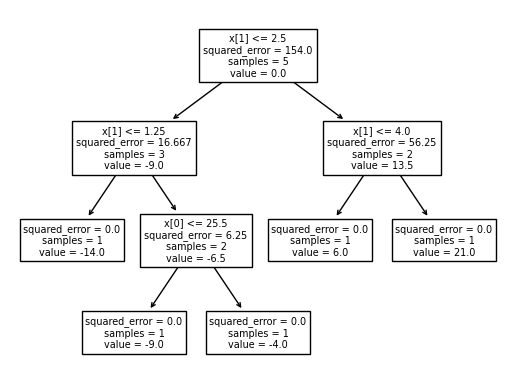

In [8]:
from sklearn import tree
tree.plot_tree(dt)

In [9]:
df['m2_pred'] = dt.predict(df[["Age","Exp"]])
df

,Age,Exp,sal,m1_pred,m1_res,m2_pred
0,20,1.0,25,39.0,-14.0,-14.0
1,23,1.5,30,39.0,-9.0,-9.0
2,35,3.0,45,39.0,6.0,6.0
3,45,5.0,60,39.0,21.0,21.0
4,28,2.0,35,39.0,-4.0,-4.0


In [10]:
df['output'] = df.m1_pred + df.m2_pred
df

,Age,Exp,sal,m1_pred,m1_res,m2_pred,output
0,20,1.0,25,39.0,-14.0,-14.0,25.0
1,23,1.5,30,39.0,-9.0,-9.0,30.0
2,35,3.0,45,39.0,6.0,6.0,45.0
3,45,5.0,60,39.0,21.0,21.0,60.0
4,28,2.0,35,39.0,-4.0,-4.0,35.0


In [11]:
lr = 0.8
df['final_pred'] = df.m1_pred + (lr*df.m2_pred)

In [12]:
df

,Age,Exp,sal,m1_pred,m1_res,m2_pred,output,final_pred
0,20,1.0,25,39.0,-14.0,-14.0,25.0,27.8
1,23,1.5,30,39.0,-9.0,-9.0,30.0,31.8
2,35,3.0,45,39.0,6.0,6.0,45.0,43.8
3,45,5.0,60,39.0,21.0,21.0,60.0,55.8
4,28,2.0,35,39.0,-4.0,-4.0,35.0,35.8


In [ ]:
df['m3_pred'] = dt.predict(df[["Age","Exp"]])
df